<a href="https://colab.research.google.com/github/pratikagithub/DL-and-NLP/blob/main/ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Forecasting is a statistical technique used to make predictions based on historical time-ordered data points. It’s valuable when dealing with data that changes over time, such as stock prices, sales figures, weather data, or economic indicators. ARIMA and SARIMA are widely used techniques for time series forecasting.

Understanding ARIMA and SARIMA for Time Series Forecasting
ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) are widely used techniques for time series forecasting. Let’s understand both these techniques one by one.

ARIMA (AutoRegressive Integrated Moving Average)
ARIMA is a statistical method for modelling and forecasting time series data. AutoRegressive (AR) models the relationship between the current value and past values in the time series. In simple words, it looks at how past observations influence future ones. The Integrated (I) component involves differencing the time series data to make it stationary. Stationarity is a critical assumption for ARIMA models. The moving Average (MA) part models the relationship between the current value and past forecast errors. It helps account for short-term fluctuations in the data.

ARIMA models are effective for time series data with trends and non-seasonal patterns.


SARIMA (Seasonal AutoRegressive Integrated Moving Average)
SARIMA extends ARIMA by including seasonal components to account for seasonality in the data. Seasonal patterns are often observed in many time series data, such as quarterly sales or monthly temperature data.

SARIMA models are well-suited for data that exhibits both non-seasonal and seasonal patterns.

**How to Implement ARIMA and SARIMA?**

Below are the steps you should follow while implementing ARIMA and SARIMA:

Start with data collection and preprocessing.

Analyze the data to determine whether it exhibits trends and seasonality.

If trends are present, apply differencing to make the data stationary.

Identify appropriate values for AR, I, and MA orders based on autocorrelation and partial autocorrelation plots.

For SARIMA, also determine seasonal orders.

Estimate the model parameters using historical data.

Finally, use the model for forecasting future data points.

**ARIMA and SARIMA using Python**

Before applying ARIMA, it is essential to ensure that the time series data is stationary, as ARIMA assumes stationarity. Stationarity can be assessed using statistical tests or visual inspection of the data. If the data is non-stationary (i.e., exhibits trends or seasonality), differencing is applied to transform the data to achieve stationarity. Differencing involves computing the difference between consecutive observations at a certain lag (usually 1) to remove trends and make the time series stationary.

Selecting appropriate values for the p, d, and q parameters is critical for building an effective ARIMA model. This process involves analyzing the autocorrelation and partial autocorrelation plots of the time series data to identify the appropriate values for p and q. The value of d is determined based on the number of differencing steps needed to achieve stationarity. Generally, if the data is stationary, the value of d is 0, and if the data is not stationary, the value of d is 1.

Implementing ARIMA models in Python can be done using libraries like statsmodels or pandas. Statsmodels provides a comprehensive set of tools for time series analysis, including ARIMA modelling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Here, we are just importing the necessary Python libraries required for the task of Time Series Forecasting using ARIMA. Now, let’s read the data:


In [4]:
# reading the data
from google.colab import files
uploaded = files.upload()

Saving Instagram-Reach.csv to Instagram-Reach (1).csv


In [5]:
data = pd.read_csv('Instagram-Reach.csv')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].dt.date

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'],
                         y=data['Instagram reach'],
                         mode='lines', name='Instagram reach'))

fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', yaxis_title='Instagram Reach')
fig.show()

You can see that this data is not stationary, and it’s not appropriate to use the ARIMA model on such data. On such data, we can use the SARIMA model, which we will explore later in the next section. For now, let’s continue with the implementation of ARIMA on this dataset only:

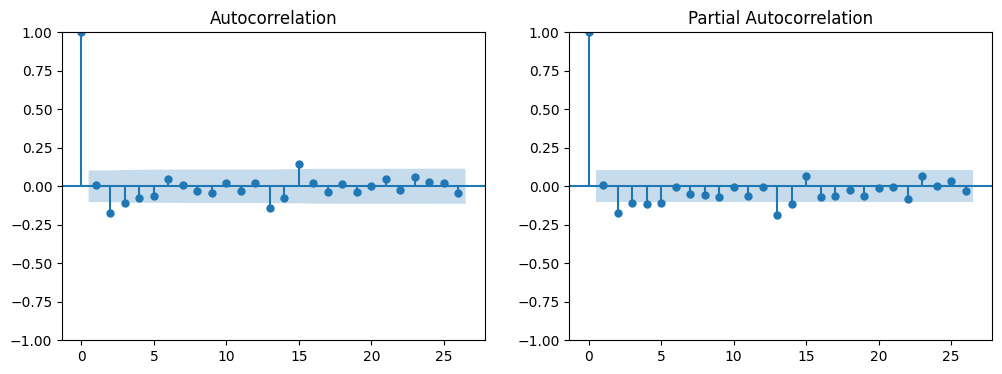

In [8]:
# resting index
time_series = data.set_index('Date')['Instagram reach']

# differencing
differenced_series = time_series.diff().dropna()

# plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

Here, we performed differencing and visualized the autocorrelation and partial autocorrelation plots which will help us in identifying the p and q values.

In the above graphs, the ACF plot cuts off at lag 1, indicating q=1. The PACF plot also cuts off at lag 1, indicating p=1. Now, here’s how to implement the ARIMA model to forecast time series:

In [9]:
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p,d,q))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:        Instagram reach   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4026.336
Date:                Tue, 26 Nov 2024   AIC                           8058.672
Time:                        09:01:23   BIC                           8070.364
Sample:                    04-01-2022   HQIC                          8063.319
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7791      0.046     17.084      0.000       0.690       0.869
ma.L1         -0.9607      0.022    -44.607      0.000      -1.003      -0.918
sigma2      2.559e+08   2.81e-11   9.11e+18      0.0

Now, here’s how we can see the predicted values for the next 100 days:

In [10]:
# predict future values
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-04-01    23434.362332
2023-04-02    24541.004432
2023-04-03    25403.218747
2023-04-04    26074.992871
2023-04-05    26598.389971
                  ...     
2023-07-05    28444.663196
2023-07-06    28444.663196
2023-07-07    28444.663196
2023-07-08    28444.663196
2023-07-09    28444.663196
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


To implement the SARIMA model, we need to follow the same process we followed to implement the ARIMA model. Below are the changes you need to make in your implementation of ARIMA to implement the SARIMA model.

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Now, to implement SARIMA, change your model from ARIMA to SARIMA and add seasonality parameters as shown in the code below:

In [12]:
p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3944.546
Date:                            Tue, 26 Nov 2024   AIC                           7899.092
Time:                                    09:05:41   BIC                           7918.410
Sample:                                04-01-2022   HQIC                          7906.779
                                     - 03-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7847      0.086      9.116      0.000       0.616       0.953
ma.L1         -0.9596      0.045   

The value of s in SARIMA represents the seasonal period or the number of time steps in each seasonal cycle. In time series data, seasonality often occurs at regular intervals. For example, in monthly data, the seasonality repeats every 12 months, while in daily data, it may repeat every 7 days (weekly seasonality) or every 30 days (monthly seasonality).

In the provided SARIMA example, the value of s is set to 12, indicating that the time series data exhibits seasonality with a repeating pattern every 12-time steps. It typically corresponds to a seasonal cycle of 12 months, suggesting that the data has yearly seasonality.